In [1]:
### Predicting why emploees are leaving the company , and learn to predict who will leave the company

# Employee Analysis
# Data Laoding and understanding feature
# Exploratory data analysis and Data visualization
# Cluster Analysis
# Building prediction model using Gradient Boosting Tree
# Evaluating model performance
# Conclusion

In [2]:
## Exploratory Analysis

# summarize characteristics of data such as pattern, trends, outliers,
# and hypothesis testing using #import mu=odles, load files

import pandas  # for dataframes
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
# matplotlib inline descriptive statistics and visualization.
data=pandas.read_csv('HR_comma_sep.csv')
data.head()



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
data.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [4]:
# Attributes names and datatypes using info()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
"""
This dataset has 14,999 samples, and 10 attributes(6 integer, 2 float, and 2 objects).
No variable column has null/missing values.
"""

col_names = data.columns.tolist()
print("Column names:")
print(col_names)
print("\nSample data:")
data.head()


Column names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']

Sample data:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
#Rename column name from “sales” to “department”
hr = data
hr=hr.rename(columns = {'sales':'department'})


In [7]:
#Print the types
hr.dtypes


satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [8]:
#data is pretty clean, no missing values?
hr.isnull().any()


satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

In [9]:
#Number of records and features
hr.shape
hr['department'].unique()


array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [10]:
#combine “technical”, “support” and “IT” these three together and call them “technical”
import numpy as np
hr['department']=np.where(hr['department'] =='support', 'technical', hr['department'])
hr['department']=np.where(hr['department'] =='IT', 'technical', hr['department'])

In [11]:
# Data Insights

left = data.groupby('left')
left.mean()
hr['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [12]:
#summary statistics
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


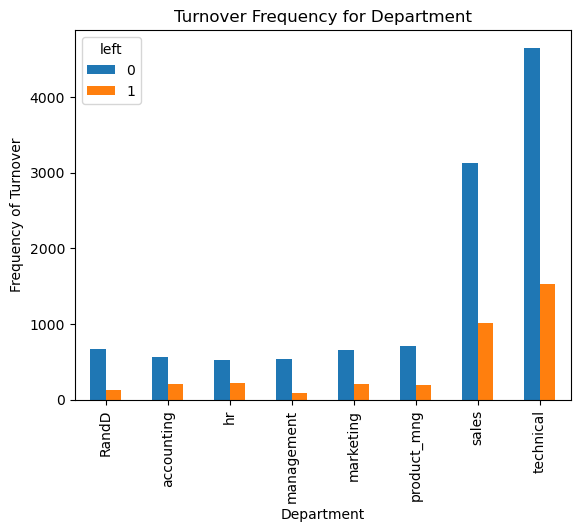

In [13]:
# data visualization

import pandas as pd
%matplotlib inline                   
#plot a bar graph using Matplotlib 
import matplotlib.pyplot as plt
pd.crosstab(hr.department,hr.left).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

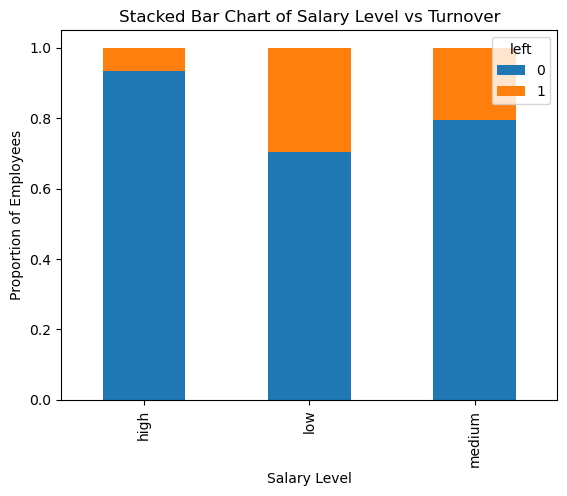

In [14]:
table=pd.crosstab(hr.salary, hr.left)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')


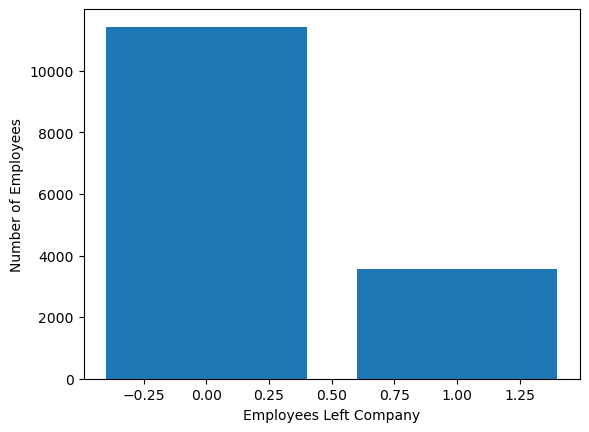

0    11428
1     3571
Name: left, dtype: int64

In [15]:
left_count=data.groupby('left').count()
plt.bar(left_count.index.values, left_count['satisfaction_level'])
plt.xlabel('Employees Left Company')
plt.ylabel('Number of Employees')
plt.show()

data.left.value_counts()



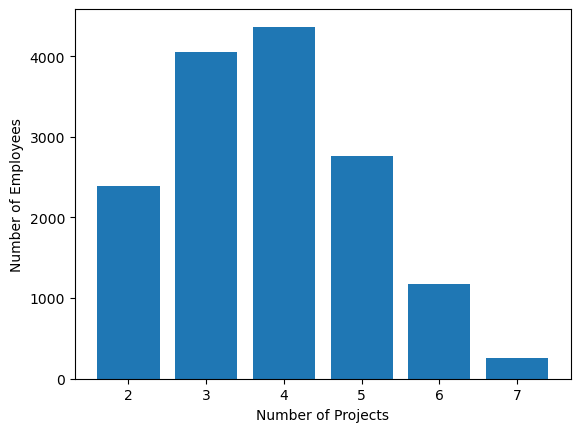

In [16]:
num_projects=data.groupby('number_project').count()
plt.bar(num_projects.index.values, num_projects['satisfaction_level'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()


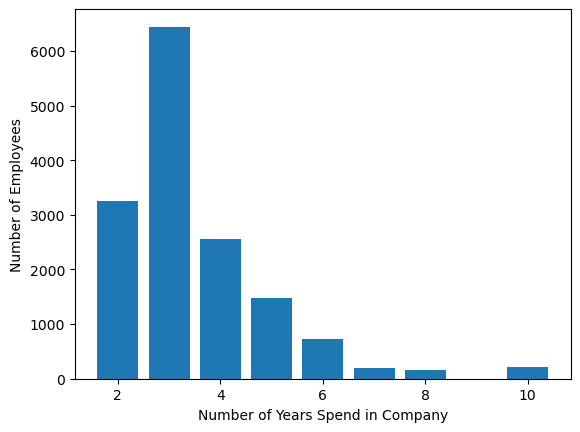

In [17]:
time_spent=data.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()


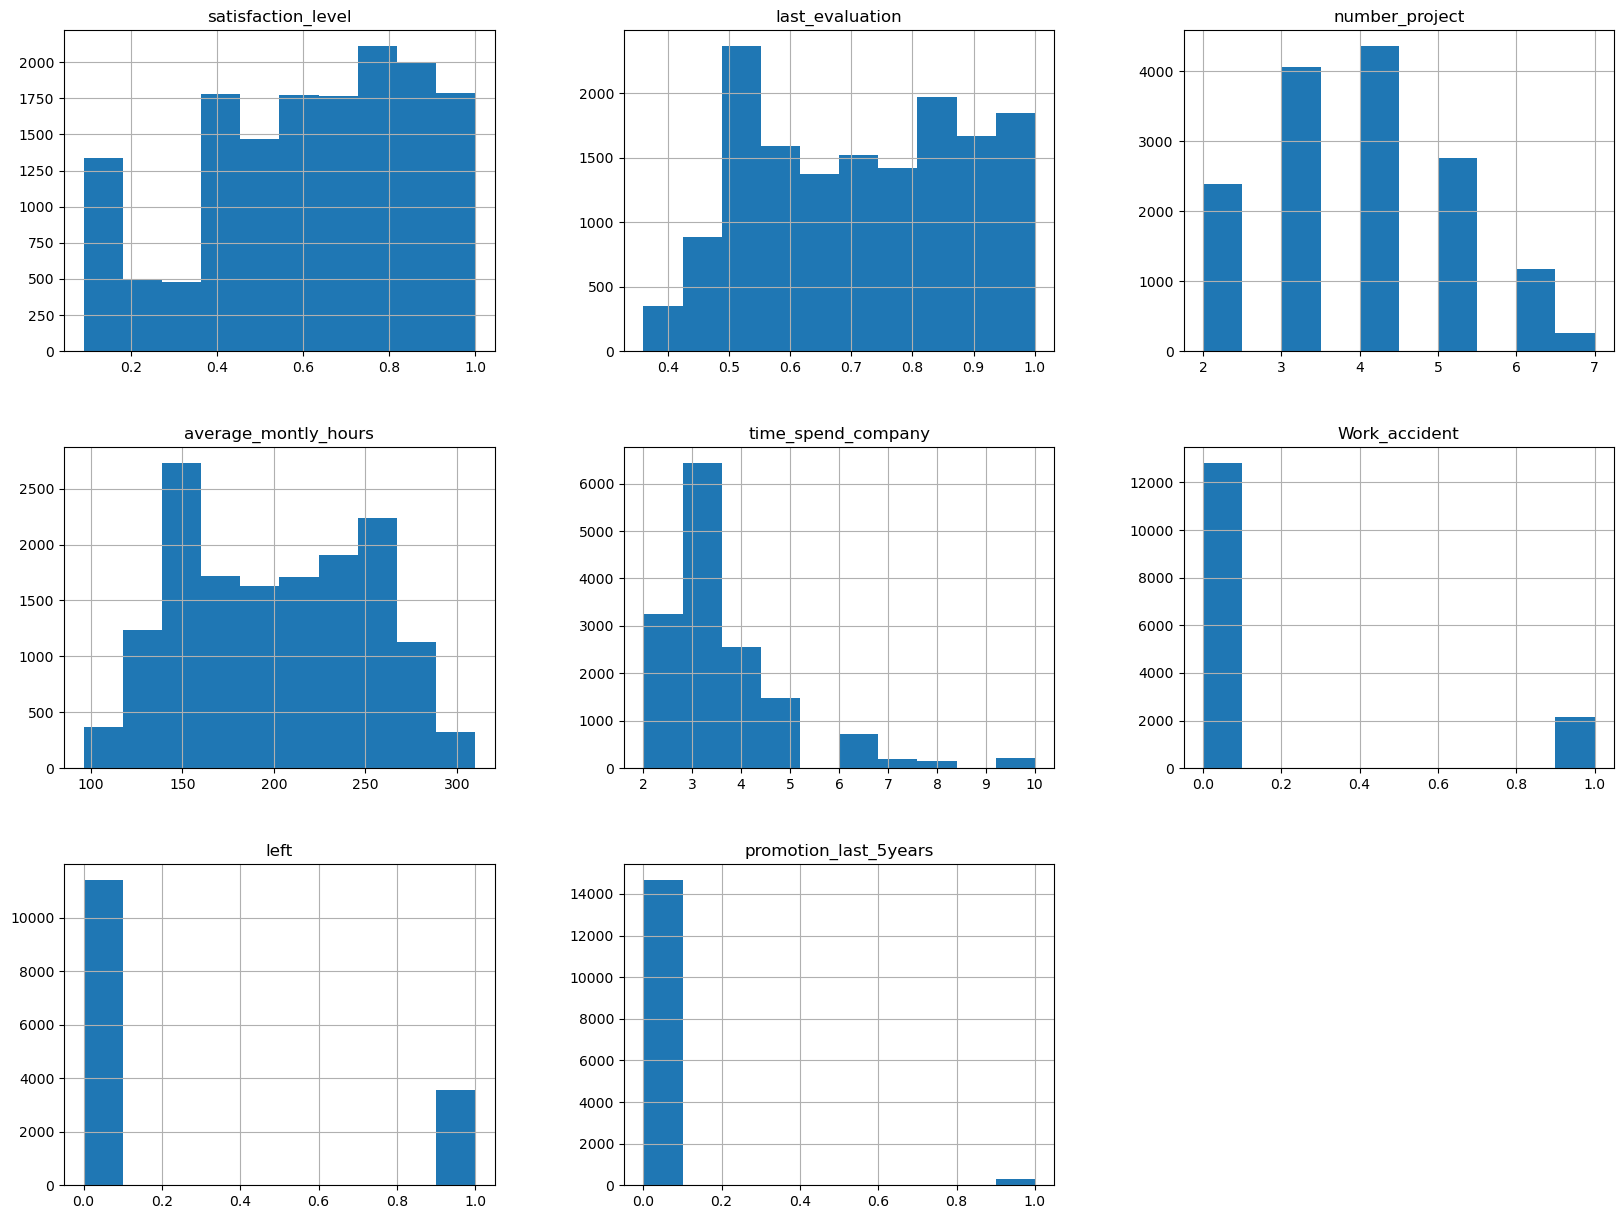

In [18]:
num_bins = 10
hr.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()


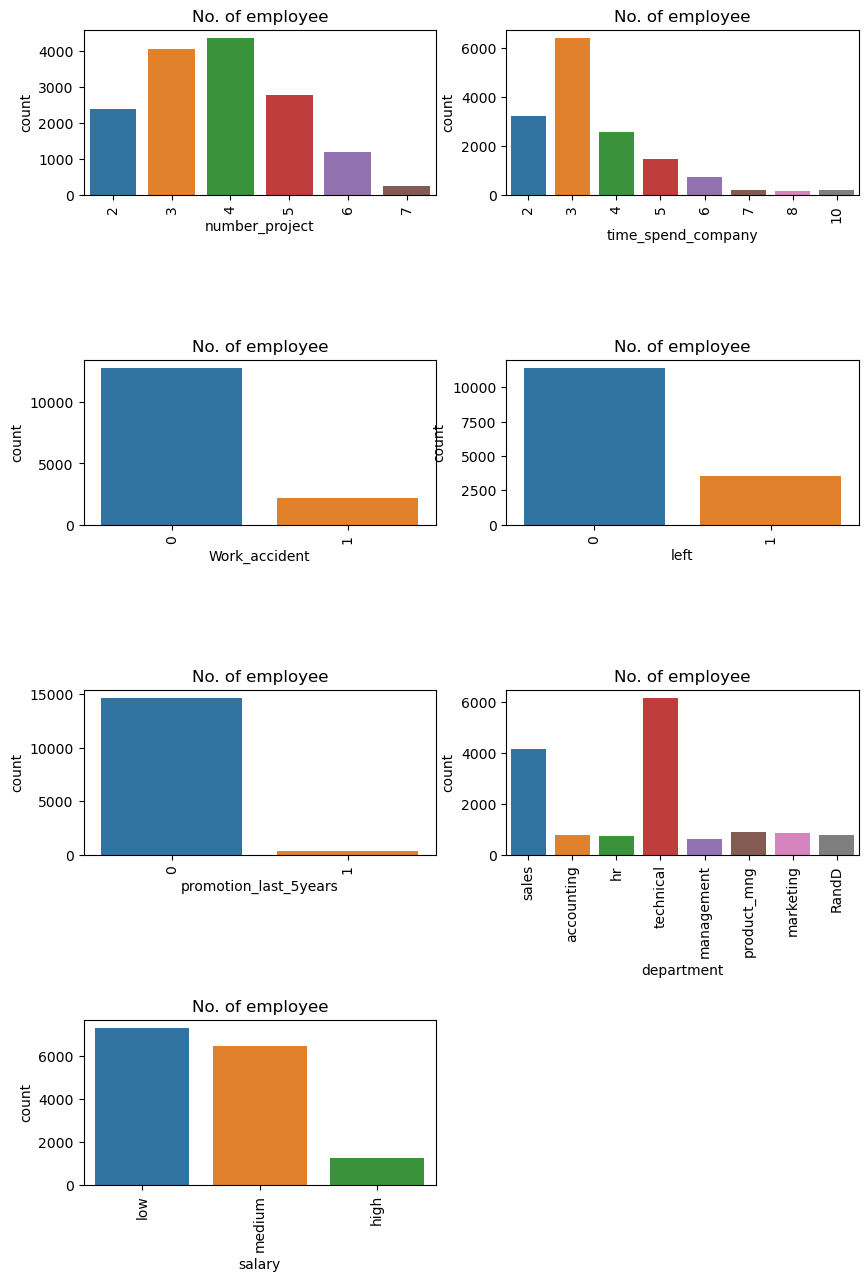

In [19]:
# plots using seaborn
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years', 'department','salary']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = hr)
    plt.xticks(rotation=90)
    plt.title("No. of employee")


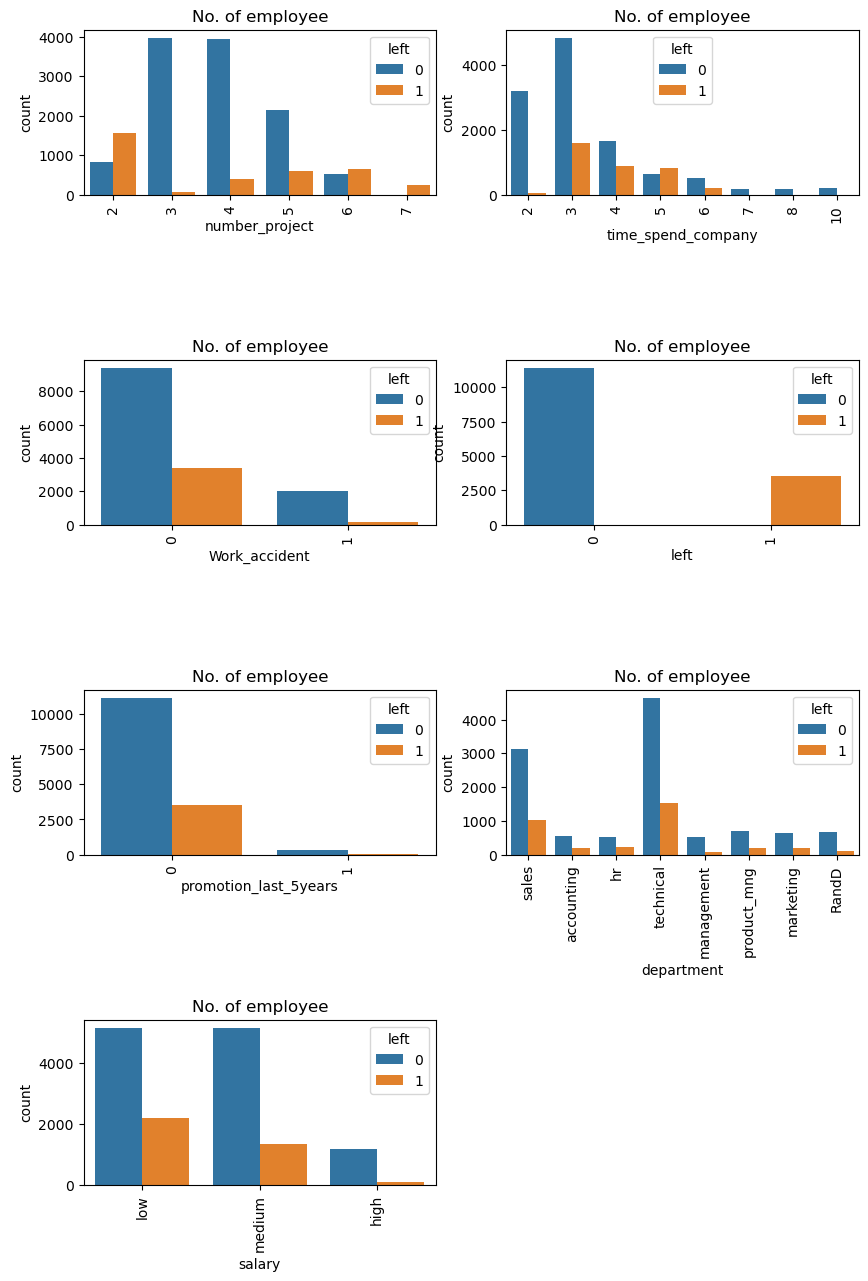

In [20]:
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = hr, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")


Data Analysis and Visualization Summary

Promotions: Employees are far more likely to quit their job if they haven't received a promotion in the last 5 years.

Time with Company: Here, The three-year mark looks like a time to be a crucial point in an employee's career. Most of them quit their job around the three-year mark. Another important point is 6-years point, where the employee is very unlikely to leave.

Number Of Projects: Employee engagement is another critical factor to influence the employee to leave the company. Employees with 3-5 projects are less likely to leave the company. The employee with less and more number of projects are likely to leave.

Salary: Most of the employees that quit among the mid or low salary groups.


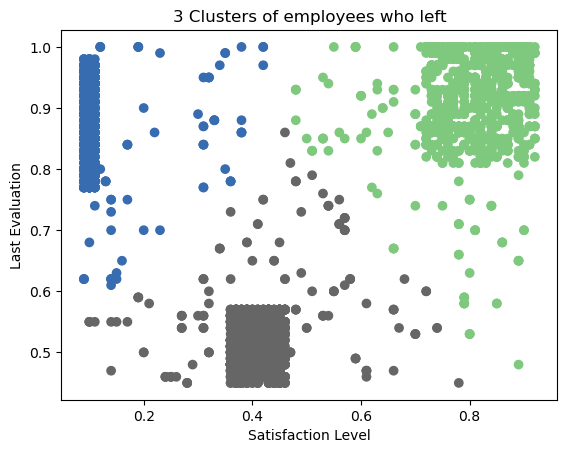

In [21]:
# Cluster Analysis: based on satisfaction and performance

#import module
from sklearn.cluster import KMeans
# Filter data
left_emp =  data[['satisfaction_level', 'last_evaluation']][data.left == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)
# Add new column "label" annd assign cluster labels.
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()



High Satisfaction and High Evaluation(Shaded by green color in the graph). Winners.

Low Satisfaction and High Evaluation(Shaded by blue color), Frustrated.

Moderate Satisfaction and moderate Evaluation (Shaded by grey color in the graph), 'Bad match'.


In [22]:
#Label encoding of categorical using sklearn
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
hr['salary']=le.fit_transform(hr['salary'])
hr['department']=le.fit_transform(hr['department'])



In [23]:
# Creating Dummy Variables for Categorical Varibles

cat_vars=['department','salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(hr[var], prefix=var)
    hr1=hr.join(cat_list)
    hr=hr1

hr.drop(hr.columns[[8, 9]], axis=1, inplace=True)
hr.columns.values

hr_vars=hr.columns.values.tolist()
y=['left']
X=[i for i in hr_vars if i not in y]


In [24]:
y

['left']

In [25]:
#Spliting data into Feature and

X=hr.drop(['left'], axis=1)
y=hr['left']
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# 70% training and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [26]:
print( X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


(10499, 18) (10499,)
(4500, 18) (4500,)


In [27]:
# fit a model
from sklearn import datasets, linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

#Print the first 5 predictions
predictions[0:5]


array([ 0.0243857 ,  0.09901588,  0.26831067,  0.43645983, -0.01177958])

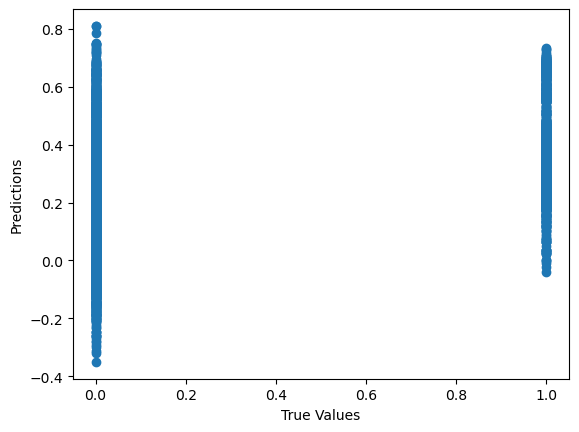

In [28]:
#plot the model

## the line/model
from matplotlib import pyplot as plt
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()


In [29]:
print("Score:", model.score(X_test, y_test))


Score: 0.20263105279077342


In [30]:
# K-folds Cross Validation

from sklearn.model_selection import KFold # import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) # create an array
y = np.array([1, 2, 3, 4]) # Create another array
kf = KFold(n_splits=2) # Define the split - into 2 folds 
kf.get_n_splits(X) # returns the number of splitting iterations in the cross-validator
print(kf) 
KFold(n_splits=2, random_state=None, shuffle=False)


KFold(n_splits=2, random_state=None, shuffle=False)


KFold(n_splits=2, random_state=None, shuffle=False)

In [31]:
for train_index, test_index in kf.split(X):
 print("TRAIN:", train_index, "TEST:", test_index)
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]



TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]
